Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

Get Persian Emotion Data

In [4]:
!wget -O female.zip "https://www.dropbox.com/s/4t6mep8mo4yf81f/female.zip?dl=0"
!wget -O male.zip "https://www.dropbox.com/s/xfi3hi927yxixa9/male.zip?dl=0"
!wget https://github.com/pariajm/sharif-emotional-speech-dataset/raw/master/shemo.json
df=pd.read_json('shemo.json').T
!unzip '*.zip' -d combined
!mv /content/combined/male/*.wav /content/combined/
!mv /content/combined/female/*.wav /content/combined/
!rm -r /content/combined/male/ /content/combined/female/
os.listdir('/content/combined/')[0]
df.index=df.index.map(lambda x : '/content/combined/'+str(x)+'.wav')
files=os.listdir('/content/combined/')
path_list=[]
emotion_list=[]
transcript_list=[]
for file in tqdm.tqdm(files,total=len(files)):
  try:
    address=f'/content/combined/{file}'
    emotion=df.loc[df.index==f'/content/combined/{file}','emotion'].item()
    transcript=df.loc[df.index==f'/content/combined/{file}','transcript'].item()
    path_list.append(address)
    emotion_list.append(emotion)
    transcript_list.append(transcript)
  except ValueError:
    pass
df=pd.DataFrame(data={'path':path_list,'emotion':emotion_list,'transcript':transcript_list})
df.head()

--2023-09-01 14:57:20--  https://www.dropbox.com/s/4t6mep8mo4yf81f/female.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/4t6mep8mo4yf81f/female.zip [following]
--2023-09-01 14:57:20--  https://www.dropbox.com/s/raw/4t6mep8mo4yf81f/female.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc2735724364f951b46b8dce65f.dl.dropboxusercontent.com/cd/0/inline/CC7yJBxqKxBmEB4rhob71Vmq65h-890Nn6Ko0nHhKak_Ysp7tQpuzJIvKS24QfAqBv35KkRQGXeKv7ZhctEMTVWcImEL0utN1RMyNjYPzq_2tdF6me8apNMAYkW76unSKyOh-KyBPuYFAmEava8YFEbi/file# [following]
--2023-09-01 14:57:21--  https://ucc2735724364f951b46b8dce65f.dl.dropboxusercontent.com/cd/0/inline/CC7yJBxqKxBmEB4rhob71Vmq65h-890Nn6Ko0nHhKak_Ysp7tQpuzJIvKS24QfAqBv35KkRQGXeKv7ZhctEMTVWcImEL0utN1RMy

100%|██████████| 3000/3000 [00:02<00:00, 1266.69it/s]


path emotion  \
0  /content/combined/M50A01.wav   angry   
1  /content/combined/F03H04.wav   happy   
2  /content/combined/M42A01.wav   angry   
3  /content/combined/F10A51.wav   angry   
4  /content/combined/F31A02.wav   angry   

                                          transcript  
0  باز هم که ساکتی، مسخرست، سربازان ما همۀ دهکده ...  
1  آقای هارترایت، به هر حال امیدوارم که از زندگی ...  
2                                 مرتیکۀ احمق بیشعور  
3  باشه، باشه. دم در می‌دمش به کاسه‌بشقابی دو تا ...  
4          بگو بینم زیر این کاسه چه نیم‌کاسه‎ای هست؟

Test One speech

In [5]:
import IPython
IPython.display.Audio("/content/combined/M10A01.wav")

Exploratory Data Analysis

In [6]:
df['emotion'].value_counts()

angry        1034
neutral      1018
sad           360
surprised     199
happy         198
fearful        29
Name: emotion, dtype: int64

<Axes: xlabel='emotion', ylabel='count'>

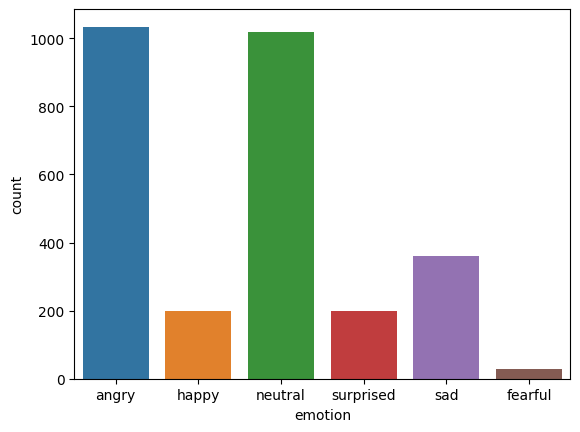

In [36]:
sns.countplot(x= 'emotion',data=df)

In [11]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

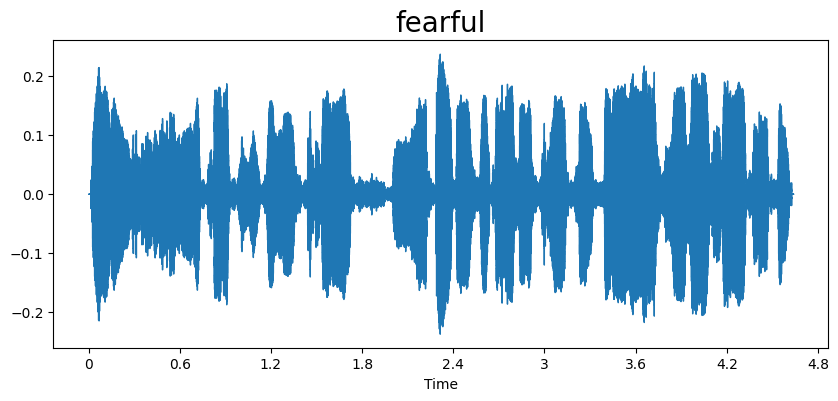

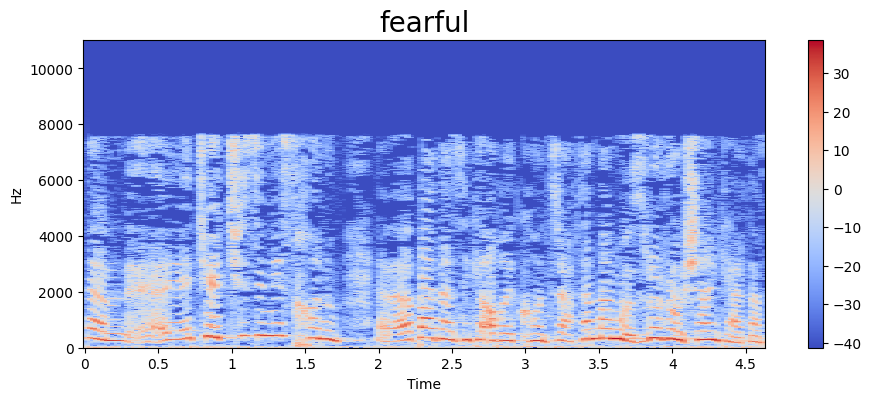

In [12]:
emotion = 'fearful'
path = np.array(df['path'][df['emotion']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

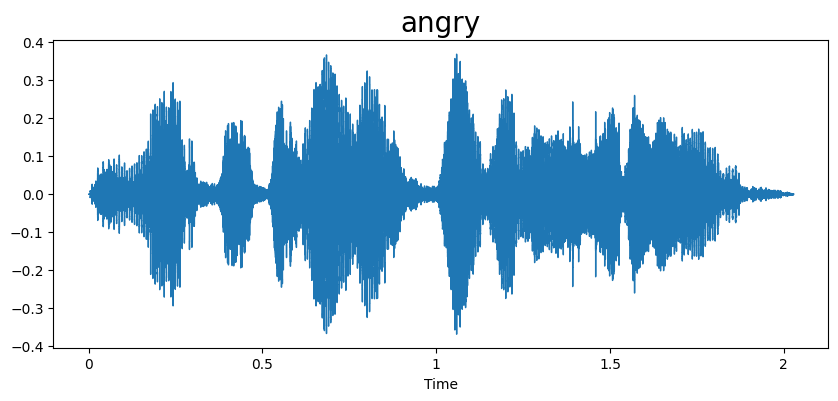

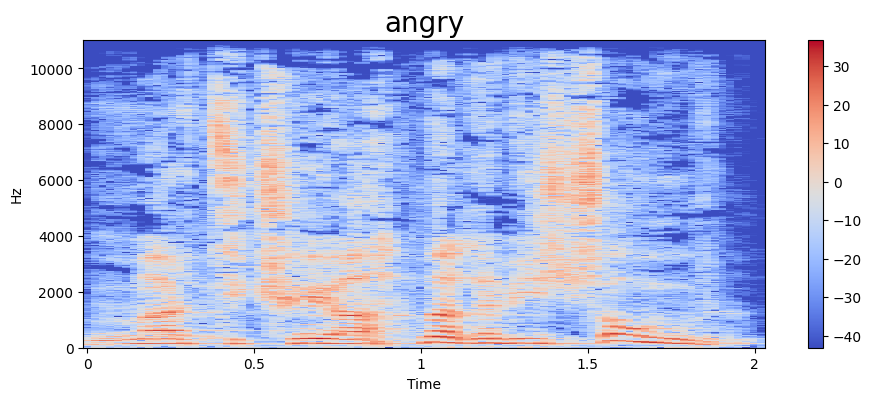

In [13]:
emotion = 'angry'
path = np.array(df['path'][df['emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

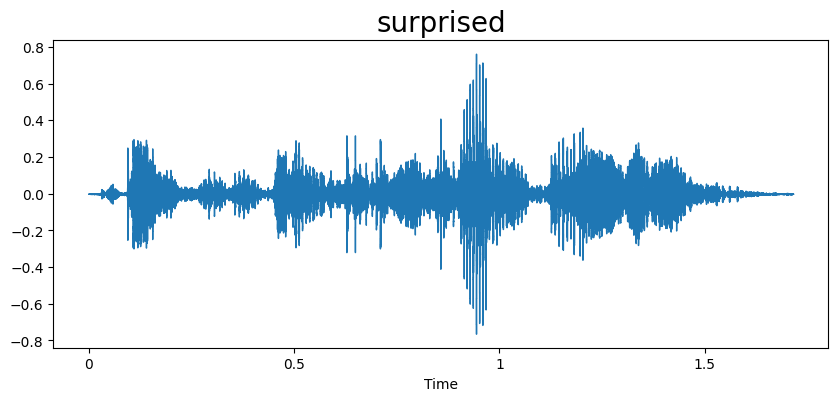

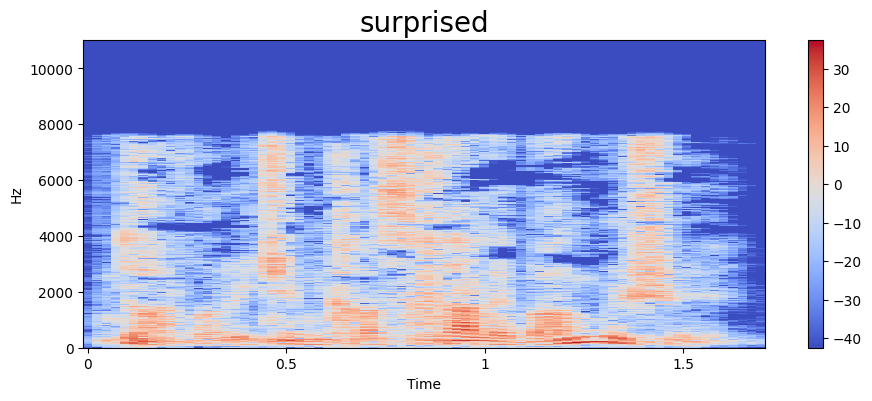

In [21]:
emotion = 'surprised'
path = np.array(df['path'][df['emotion']==emotion])[5]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

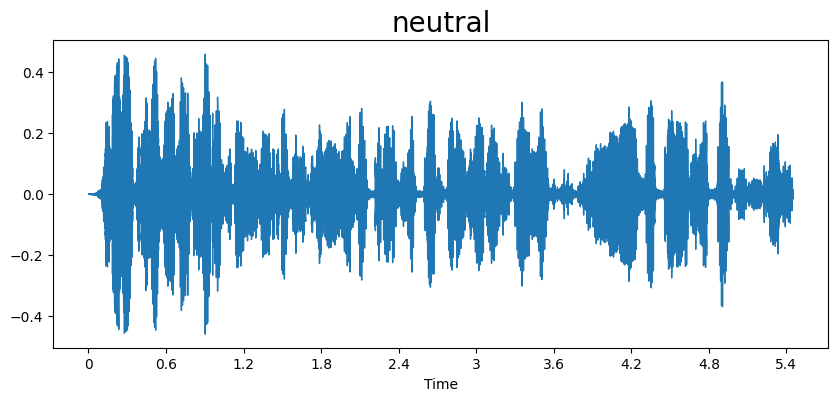

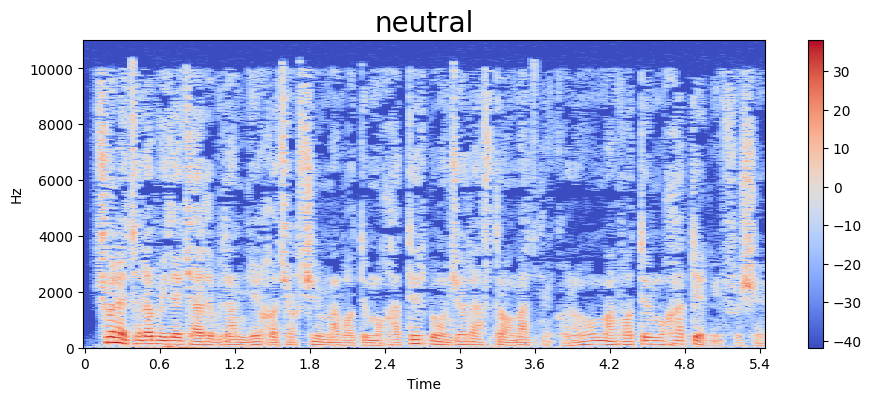

In [14]:
emotion = 'neutral'
path = np.array(df['path'][df['emotion']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

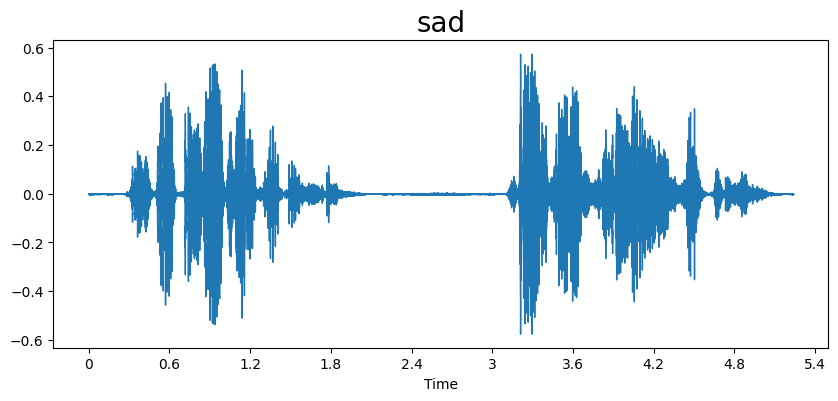

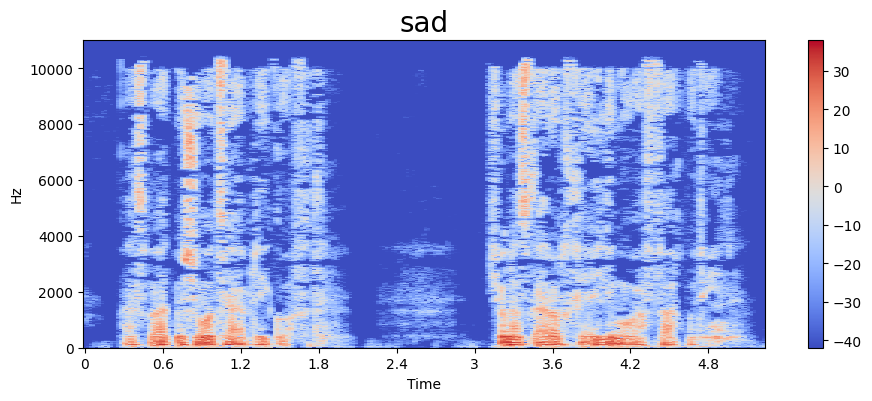

In [15]:
emotion = 'sad'
path = np.array(df['path'][df['emotion']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

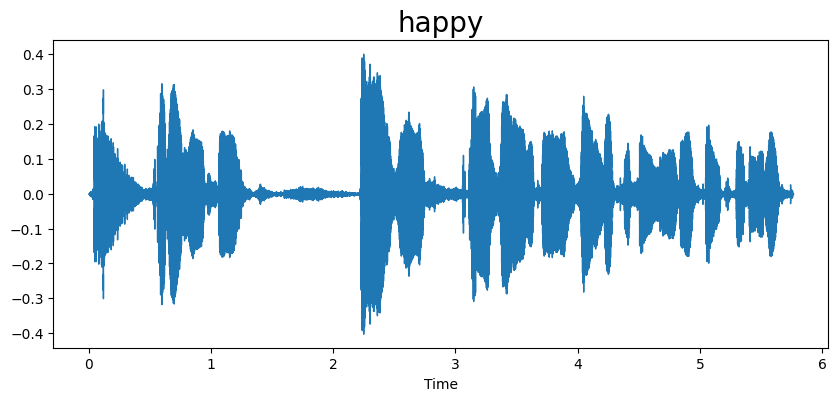

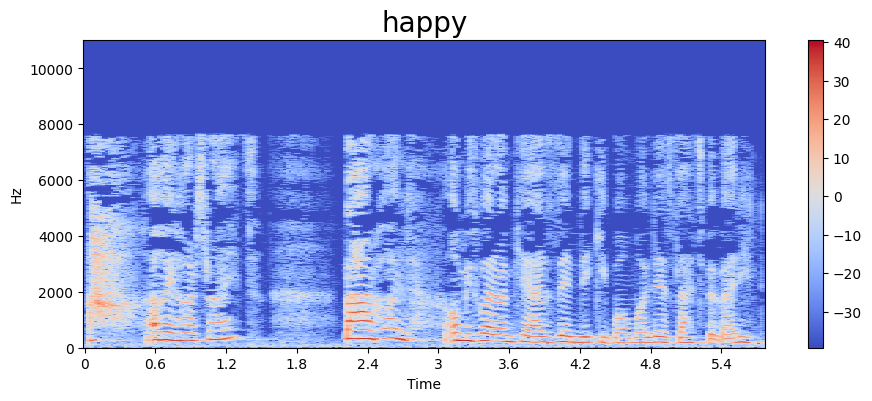

In [18]:
emotion = 'happy'
path = np.array(df['path'][df['emotion']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [22]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [23]:
extract_mfcc(df['path'][0])

array([-3.6007211e+02,  5.0950287e+01, -4.2972150e+00,  2.7704807e+01,
       -5.9025578e+00,  1.5995487e+01, -1.3238636e+01, -2.8401141e+00,
       -5.1897573e+00,  2.8890896e+00, -1.7135363e+01,  9.1495314e+00,
       -4.0696912e+00, -8.0250090e-01, -7.2526650e+00,  5.3006883e+00,
       -5.4658308e+00, -3.2984579e+00, -4.7328677e+00,  5.6402273e+00,
       -1.0941373e+01,  7.0260054e-01, -8.3112806e-01,  1.4165876e+00,
       -6.2710705e+00,  2.6859901e+00, -1.6639911e+00,  9.3101692e-01,
       -3.8299012e+00,  4.7003522e+00, -6.7140050e+00, -1.8162982e-01,
       -2.1469638e+00, -2.3319852e+00, -5.8231473e+00,  1.2685859e+00,
       -5.4853568e+00,  6.1331117e-01, -2.3822095e+00,  2.6046753e+00],
      dtype=float32)

In [24]:
X_mfcc = df['path'].apply(lambda x: extract_mfcc(x))

In [25]:
X_mfcc

0       [-360.0721, 50.950287, -4.297215, 27.704807, -...
1       [-311.0082, 106.1759, -26.01211, 17.18066, -10...
2       [-214.44632, 69.52277, -6.045303, 31.575054, 9...
3       [-260.83304, 77.98972, -22.203293, 31.13232, -...
4       [-258.45462, 38.025673, 12.705851, 26.637388, ...
                              ...                        
2833    [-228.13948, 84.201866, -24.336754, 12.041007,...
2834    [-249.67636, 76.56919, -29.565783, 22.970411, ...
2835    [-280.21985, 93.0237, 3.6614673, 22.382263, 5....
2836    [-288.12698, 147.38228, -24.515926, 61.2029, -...
2837    [-273.08954, 96.812584, -12.403136, 65.38548, ...
Name: path, Length: 2838, dtype: object

In [26]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2838, 40)

In [27]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2838, 40, 1)

In [28]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['emotion']])

In [31]:
y.shape

(2838, 6)

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')
],name='SER')

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "SER"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 6)                 390     

In [34]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
36/36 [==============================] - 9s 24ms/step - loss: 1.4041 - accuracy: 0.5286 - val_loss: 1.2823 - val_accuracy: 0.5458
Epoch 2/50
36/36 [==============================] - 0s 11ms/step - loss: 1.2233 - accuracy: 0.5881 - val_loss: 1.1882 - val_accuracy: 0.6162
Epoch 3/50
36/36 [==============================] - 0s 11ms/step - loss: 1.1682 - accuracy: 0.6123 - val_loss: 1.1292 - val_accuracy: 0.6180
Epoch 4/50
36/36 [==============================] - 0s 12ms/step - loss: 1.1442 - accuracy: 0.6167 - val_loss: 1.2224 - val_accuracy: 0.5687
Epoch 5/50
36/36 [==============================] - 0s 12ms/step - loss: 1.1322 - accuracy: 0.6203 - val_loss: 1.1260 - val_accuracy: 0.6056
Epoch 6/50
36/36 [==============================] - 0s 11ms/step - loss: 1.1301 - accuracy: 0.6207 - val_loss: 1.1582 - val_accuracy: 0.5986
Epoch 7/50
36/36 [==============================] - 0s 13ms/step - loss: 1.1099 - accuracy: 0.6242 - val_loss: 1.1196 - val_accuracy: 0.6127
Epoch 8/50
36

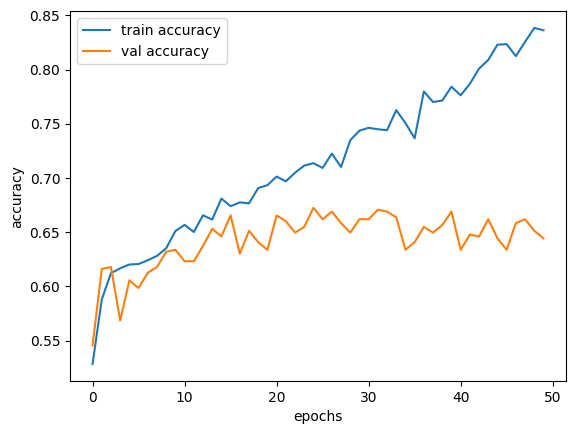

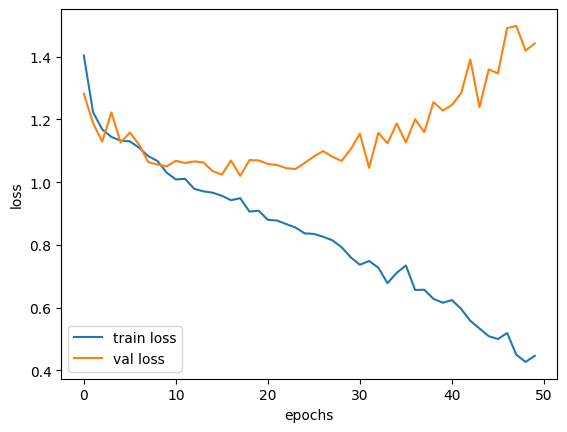

In [35]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()